In [35]:
import os 
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import image_dataset_from_directory

In [36]:
test = image_dataset_from_directory(directory="C:/Users/gpari/OneDrive/Documents/Codes/Rugved/Task_8/test_set/test_set", color_mode="rgb", image_size=(100,100), shuffle=True, label_mode="binary", batch_size=32)
tng = image_dataset_from_directory(directory="C:/Users/gpari/OneDrive/Documents/Codes/Rugved/Task_8/training_set/training_set", color_mode="rgb", image_size=(100,100), shuffle=True, label_mode="binary", batch_size=32)
class_names = ["cat", "dog"]

Found 2023 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.


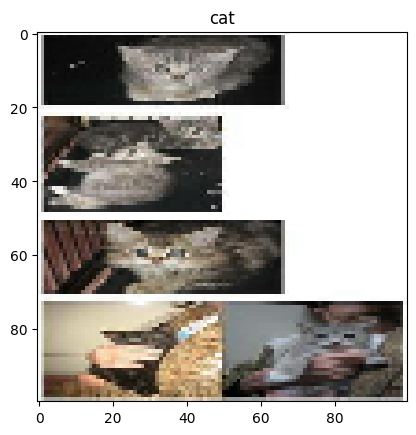

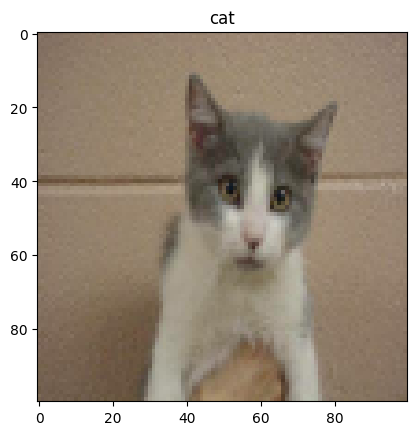

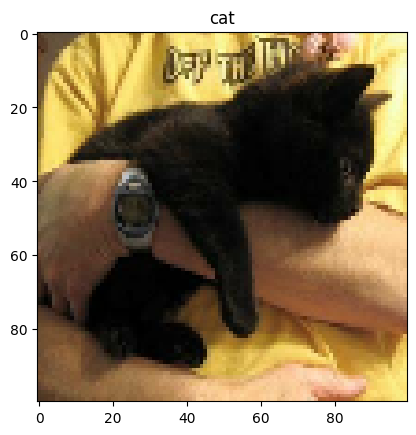

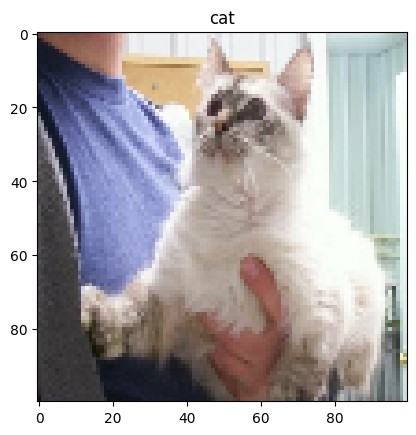

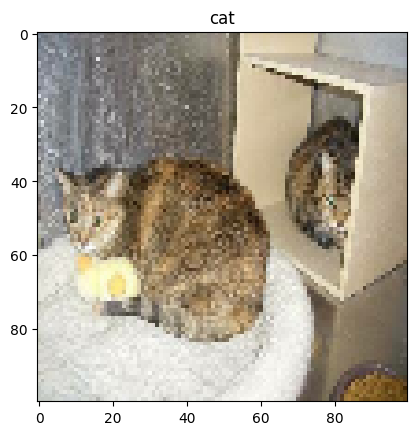

In [37]:
for images, labels in tng.take(1):
    for i in range(5):
        plt.imshow(images[i].numpy().astype(int))
        plt.title(label=class_names[int(labels[i])])
        plt.show()

In [38]:
def preprocess_image(image, label):
    
    image = image / 255.0
    return image, label

tng_preprocessed = tng.map(preprocess_image)
test_preprocessed = test.map(preprocess_image)


In [39]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(100,100,3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 98, 98, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1800)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       115,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,937 (456.79 KB)

 Trainable params: 116,937 (456.79 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(tng_preprocessed, epochs=30)

Epoch 1/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5336 - loss: 0.6891
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6550 - loss: 0.6305
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.7052 - loss: 0.5749
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7409 - loss: 0.5310
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7484 - loss: 0.5200
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 16s 62ms/step - accuracy: 0.7657 - loss: 0.5014
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.7691 - loss: 0.4803
Epoch 8/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.7834 - loss: 0.4618
Epoch 9/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7861 - loss: 0.4547
Epoch 10/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7949 - loss: 0.4379
Epoch 11/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.8073 - loss: 0.4225
Epoch 12/30
251/251 ━━━━━━━━━━━━━━━━━━

In [41]:
model.evaluate(test_preprocessed)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7375 - loss: 0.8223


[0.7456182837486267, 0.7548195719718933]